# DATA 550 Lab 4 - Storytelling and visualizing trends and uncertainties

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the Python version.

Each partner should choose a version to complete, though keep in mind that **you are required to alternate between completing the R labs and the Python labs** to get experience using both languages.

## Acknowledgemnts

This lab was lightly adapted from the one created by Joel Ostblom for the DSCI 531 version of Data Viz I in the 2020/21 Academic year.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li>Each partner should complete one file, though collaboration is permitted.</li>
  <li>Push your <code>.ipynb</code> files to GitHub frequently (i.e. not just in one fell swoop at the end).</li>
  <li>Don't forget to submit a clickable link to your GitHub repo on Canvas so we can grade it.</li>
</ul>
</div>

# 0. The back story

*(If you don't like the back stories, you can jump down to the heading "The data" Also a disclaimer that I am not a linguist, so this lab is my understanding of some articles I have read, it is likely not perfect.)*

First, I just want to thank you for bringing me back to my senses and stopping my world domination attempt and silly startup idea. I don't know what happen, but I clearly wasn't myself there for a while. Now that you have brought me back to normal, I would like design this lab more similar to the first one and go through a topic that I find intriguing and ponder-worthy.

This time, instead of looking around us, we will look inside. Ever since I arrived on this planet, I have been fascinated about your use of airborn oscillations to transmit information generated by electrical impulses. And the fact that you rely on muscular dexterity for the encoding process as well as passive mechnotransduction for the decoding is truly remarkable (in a primitive sense of course, I guess how your kind can appreciate "the remarkable complexity" of a cave painting). Such a system is clearly a bottleneck in terms of information bandwidth and I am surprised a more direct means of intercranial transmission never evolved here, but from the perspective of my research on less evolved galactic lifeforms I find this fascinating!

After hearing that there are over 7,000 languages spoken across this globe, I am curious whether some of these at least allow for more rapid information transmission than others. The implications of this reach beyond just communication as I have recently learned that you also restrict many of your thoughts to those that can be expressed in words (again, fascinating!). This means that you could literally upgrade your thought throughput by learning a new language. And it could mean that there are groups of people who have access to faster thinking others, just because their language can convey information at a higher rate, what an enormous advantage!

## The data

To aid our exploration of whether some languages are more efficient at conveying information than others, I have received assistance from some of your finest scientists. The data in this lab was published as part of a study in Science Advances in 2019 and made publicly available in their online repository. If you want to read part of the article, I recommend that you do it after attempting to answer the questions (or if you get stuck) since it will give away some of the things that we can otherwise "discover" ourselves. There is also a popular science version of this article publish in The Economist, and I link to both in the optional question at the end.

The scientists have compiled two tables, one with general information on the languages we are studying and one with experimental data where they recorded people speaking a certain text in different languages and noted down how fast they spoke, etc. You can find a description of the columns of both datasets below and they are available in your lab repo.

---

<center><h3>Languages dataset</h4></center>

| Column              | Description                                       |
|---------------------|---------------------------------------------------|
| iso_lang            | ISO_639-3 language code                           |
| language            | Language name                                     |
| information density | Bits of information per syllable in the language  |
| distinct_syllables  | The number of different syllables in the language |
| continent           | The continent where the language is spoken        |

---

<center><h3>Spoken texts dataset</h4></center>

| Column    | Description                                     |
|-----------|-------------------------------------------------|
| speaker   | Speaker ID                                      |
| iso_lang  | ISO_639-3 language code                         |
| text      | Text ID                                         |
| sex       | The sex of the speaker                          |
| duration  | The number of seconds it took to speak the text |
| syllables | Number of syllables uttered during the speech   |
| age       | The age of the speaker                          |

---

Overall, you will have a bit less direction in this lab to closer simulate a real-life scenario. The questions are a mix of explicit instructions and describing the problem in text, rather than in exact steps. As part of this, there is also a few data wrangling steps needed. As this is an exercise in you interpreting information, it is up to you to clarify what you don't understand with me and the TAs during labs and office hours, just as you would in a real-life collaboration.

In [8]:
import altair as alt

alt.renderers.enable("mimetype")
alt.renderers.enable("html")
alt.data_transformers.enable("default")


DataTransformerRegistry.enable('default')

# 1. Language exploration

<p>Let’s first get familiar with potential differences and similarities between the languages in this data set. Clearly a language's information density is going to be important in how quick a speaker can convey information, but I wonder if number of distinct syllabus matter. Let's see if we can see any patterns by organizing the languages by these two variables.</p>

<div class="alert alert-info" style="color:black">

### Question 1
rubric={accuracy:1,visualization:1}

<h4>Python</h4>
<ol type="1">
<li>Create a scatterplot of the information density of each language versus its number of distinct syllabus. Zoom in to the extent of the data instead of forcing zero to be in the axis.</li>
<li>You will notice that the data appears to cluster in groups in the scatter plot. Can you find a categorical variable in this dataframe that roughly explains this clustering? Color the points in the plot you just created according that variable and add a suitable trend line for each cluster. If there are any points that seem to be outliers, avoid overfitting the trendline to them.</li>
<li>If you think any particular data points deviate from their cluster, label them with their language name in the plot.</li>
</ol>

</div>

In [12]:
# YOUR ANSWER GOES HERE
import altair as alt
import pandas as pd
import numpy as np

languages = pd.read_csv("languages.csv") 
languages.head()

base = (
    alt.Chart(languages)
    .mark_circle(size=90, opacity=0.8)
    .encode(
        x=alt.X("distinct_syllables:Q", title="Distinct syllables", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", title="Information density (bits/syllable)", scale=alt.Scale(zero=False)),
        tooltip=["language:N", "iso_lang:N", "continent:N",
                 "distinct_syllables:Q", "information_density:Q"]
    )
    .properties(width=700, height=450)
)

colored = base.encode(color=alt.Color("continent:N", title="Continent"))

trend = (
    alt.Chart(languages)
    .transform_regression(
        "distinct_syllables", "information_density",
        groupby=["continent"], method="linear"
    )
    .mark_line(size=3)
    .encode(
        x=alt.X("distinct_syllables:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", scale=alt.Scale(zero=False)),
        color="continent:N"
    )
)

(colored + trend).properties(width=700, height=450)

# Compute residuals (fit a separate linear line for each continent)
df = languages.dropna(subset=["distinct_syllables", "information_density", "continent", "language"]).copy()

parts = []
for cont, g in df.groupby("continent"):
    x = g["distinct_syllables"].to_numpy()
    y = g["information_density"].to_numpy()
    a, b = np.polyfit(x, y, 1)
    resid = y - (a * x + b)

    tmp = g.copy()
    tmp["resid"] = resid
    tmp["abs_resid"] = np.abs(resid)
    parts.append(tmp)

df_resid = pd.concat(parts, ignore_index=True)

#For each continent, label the top_k languages that deviate the most from their continent’s trend
top_k = 1  
labels_df = (df_resid.sort_values(["continent", "abs_resid"], ascending=[True, False])
                    .groupby("continent")
                    .head(top_k))

# Define outliers: within each continent, points with abs_resid above the 90th percentile are treated as outliers
df_fit = df_resid.copy()
df_fit["is_outlier"] = df_fit.groupby("continent")["abs_resid"].transform(
    lambda s: s > s.quantile(0.90)
)

# Plot: all points + continent-specific trend lines (fit using non-outliers) + language labels
base = (
    alt.Chart(df_resid)
    .mark_circle(size=90, opacity=0.8)
    .encode(
        x=alt.X("distinct_syllables:Q", title="Distinct syllables", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", title="Information density (bits/syllable)", scale=alt.Scale(zero=False)),
        color=alt.Color("continent:N", title="Continent"),
        tooltip=["language:N", "continent:N", "distinct_syllables:Q", "information_density:Q"]
    )
    .properties(width=750, height=450)
)

trend = (
    alt.Chart(df_fit)
    # fit trendline + remove outliers
    .transform_filter(~alt.datum.is_outlier)  
    .transform_regression(
        "distinct_syllables", "information_density",
        groupby=["continent"], method="linear"
    )
    .mark_line(size=3)
    .encode(
        x=alt.X("distinct_syllables:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", scale=alt.Scale(zero=False)),
        color="continent:N"
    )
)

labels = (
    alt.Chart(labels_df)
    .mark_text(align="left", dx=7, dy=-7)
    .encode(
        x=alt.X("distinct_syllables:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", scale=alt.Scale(zero=False)),
        text="language:N",
        color=alt.value("black")
    )
)

base + trend + labels



alt.LayerChart(...)

Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): iso_lang, language, continent
dbl (2): information_density, distinct_syllables

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'


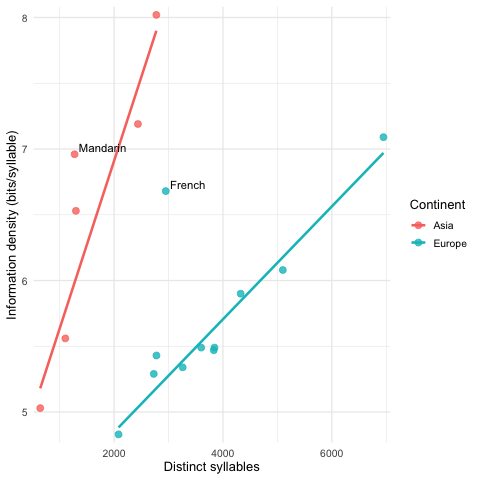

In [8]:
%%R

library(readr)
library(dplyr)
library(ggplot2)

languages <- read_csv("languages.csv")

df <- languages %>%
  filter(
    !is.na(distinct_syllables),
    !is.na(information_density),
    !is.na(continent),
    !is.na(language)
  )

df_resid <- df %>%
  group_by(continent) %>%
  mutate(
    resid = resid(lm(information_density ~ distinct_syllables)),
    abs_resid = abs(resid),
    is_outlier = abs_resid > quantile(abs_resid, 0.90)
  ) %>%
  ungroup()

top_k <- 1
labels_df <- df_resid %>%
  group_by(continent) %>%
  slice_max(abs_resid, n = top_k, with_ties = FALSE) %>%
  ungroup()

plot_a <- ggplot(df_resid, aes(x = distinct_syllables, y = information_density, color = continent)) +
  geom_point(size = 2.8, alpha = 0.8) +
  geom_smooth(
    data = df_resid %>% filter(!is_outlier),
    method = "lm",
    se = FALSE,
    linewidth = 1.2
  ) +
  geom_text(
    data = labels_df,
    aes(label = language),
    color = "black",
    hjust = 0,          
    nudge_x = 80,       
    nudge_y = 0.05,     
    size = 4
  ) +
  labs(
    x = "Distinct syllables",
    y = "Information density (bits/syllable)",
    color = "Continent"
  ) +
  scale_x_continuous(expand = expansion(mult = 0.02)) +
  scale_y_continuous(expand = expansion(mult = 0.02)) +
  theme_minimal(base_size = 13)

plot_a


# 2. Speech rate and information density

Hmm... what an intriguing relationship we just revealed... let’s keep these clusters in mind while exploring whether continuing our exploration. The two variables that directly determine the information rate of a language are its information density (bits of information per syllable) and the rate at which it is spoken (syllables per second). A high value in both would indicate a high information rate and efficient communication (a higher number of information bits conveyed per second).

<div class="alert alert-info" style="color:black">

### Question 2
rubric={reasoning:2,accuracy:3}
    
<h4>Python</h4> 
<ol type="1">
<li>While the information density of each language have already been provided to us, we will have to approximate the speech rate (syllables per second) of each language via the <code>spoken_texts</code> dataset. Using this data, calculate the average speech rate per language (for now, treat all entries as individual observations, even if some are read by the same person).</li>
    <li>Create a new column, <code>speech_rate</code>, in the <code>languages</code> data frame that hold these average values. Since the calculated values are not in the same order as the languages in the <code>languages</code> data frame, you cannot simply append it. Instead, you can use the dataframe merge method to join the series of average speech rate values that you just created with the <code>languages</code> dataframe. The language ISO codes could be used as the column to merge on.</li>
<li>Create a scatter plot of the information density versus the speech rate for the <code>languages</code> dataframe. Use the same groupings as in the previous scatter plot you made and add one trend line per group. Label the same points with text labels as in the previous scatterplot. Zoom in to the extent of the data instead of forcing zero to be in the axes.</li>
<li>Write a few sentences under the plot describing the relationship you observe. Based on this plot, do speakers of any particular languages appear to be more efficient at conveying information?</li>
</ol>
    
</div>

In [21]:
# YOUR ANSWER GOES HERE
import altair as alt
import pandas as pd
import numpy as np

languages_df = pd.read_csv("languages.csv")
spoken_df = pd.read_csv("spoken-texts.csv")
#languages_df.columns, spoken_df.columns

speech_rate_by_lang = (
    spoken_df.assign(speech_rate = spoken_df["syllables"] / spoken_df["duration"])
            .groupby("iso_lang", as_index=False)["speech_rate"]
            .mean()
)

languages_df = languages_df.merge(speech_rate_by_lang, on="iso_lang", how="left")

languages_df[["language","iso_lang","information_density","speech_rate","continent"]].head()

base2 = (
    alt.Chart(languages_df.dropna(subset=["speech_rate", "information_density"]))
    .mark_circle(size=90, opacity=0.8)
    .encode(
        x=alt.X("speech_rate:Q", title="Speech rate (syllables/second)", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", title="Information density (bits/syllable)", scale=alt.Scale(zero=False)),
        color=alt.Color("continent:N", title="Continent"),
        tooltip=["language:N","continent:N","speech_rate:Q","information_density:Q"]
    )
    .properties(width=750, height=450)
)

trend2 = (
    alt.Chart(languages_df.dropna(subset=["speech_rate", "information_density"]))
    .transform_regression("speech_rate", "information_density", groupby=["continent"], method="linear")
    .mark_line(size=3)
    .encode(
        x=alt.X("speech_rate:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", scale=alt.Scale(zero=False)),
        color="continent:N"
    )
)

label_names = ["Mandarin", "French"]

labels2 = (
    alt.Chart(languages_df[languages_df["language"].isin(label_names)])
    .mark_text(align="left", dx=7, dy=-7, color="black")
    .encode(
        x=alt.X("speech_rate:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("information_density:Q", scale=alt.Scale(zero=False)),
        text="language:N"
    )
)

(base2 + trend2 + labels2).properties(width=750, height=450)



alt.LayerChart(...)

Rows: 17 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): iso_lang, language, continent
dbl (2): information_density, distinct_syllables

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2288 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): speaker, iso_lang, text, sex
dbl (3): duration, syllables, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'


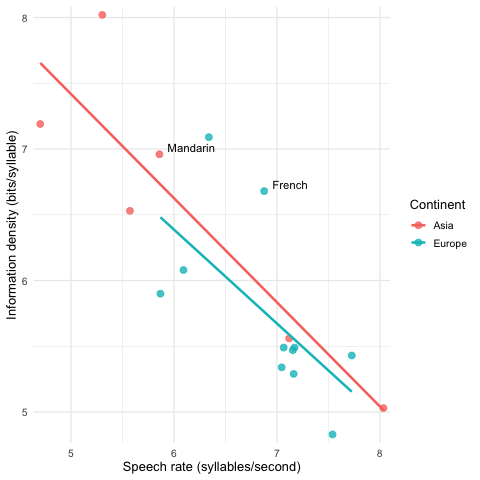

In [9]:
%%R

library(readr)
library(dplyr)
library(ggplot2)

# read data
languages_df <- read_csv("languages.csv")
spoken_df <- read_csv("spoken-texts.csv")

# average speech rate per language (syllables/second)
speech_rate_by_lang <- spoken_df %>%
  mutate(speech_rate = syllables / duration) %>%
  group_by(iso_lang) %>%
  summarise(speech_rate = mean(speech_rate), .groups = "drop")

# merge into languages_df
languages_df <- languages_df %>%
  left_join(speech_rate_by_lang, by = "iso_lang")

# labels
label_names <- c("Mandarin", "French")
labels_df <- languages_df %>%
  filter(language %in% label_names)

# plot
plot_b <- ggplot(languages_df, aes(x = speech_rate, y = information_density, color = continent)) +
  geom_point(size = 2.8, alpha = 0.8, na.rm = TRUE) +
  # one linear trend line per continent
  geom_smooth(method = "lm", se = FALSE, linewidth = 1.2, na.rm = TRUE) +
  # label Mandarin and French (geom_text)
  geom_text(
    data = labels_df,
    aes(label = language),
    color = "black",
    hjust = 0,
    nudge_x = 0.08,     # adjust if labels overlap (similar to dx)
    nudge_y = 0.05,     # adjust if labels overlap (similar to dy)
    size = 4,
    na.rm = TRUE
  ) +
  labs(
    x = "Speech rate (syllables/second)",
    y = "Information density (bits/syllable)",
    color = "Continent"
  ) +
  # zoom to data extent 
  scale_x_continuous(expand = expansion(mult = 0.02)) +
  scale_y_continuous(expand = expansion(mult = 0.02)) +
  theme_minimal(base_size = 13)

plot_b

YOUR ANSWER TO 4 GOES HERE

Thsi plot shows a clear trade-off: languages with higher information density tend to be spoken more slowly, while faster speech rates usually come with lower infomration density. This pattern apperas in both Asia and Europe (downward trend lines). Based on this plot alone, no language looks obviously "most efficient", since languages seem to balance speed and density differently. 

# 3. Language information rate

Oh those results are very interesting… Hmmm I wonder why it looks like that… Ahhh I see what happened, I forgot to include the severe limitations of the feeble human mind in my hypothesis, oh oops you’re still here, ehh well 🪄*obliviate* to you and let’s carry on.

<div class="alert alert-info" style="color:black">

### Question 3
rubric={accuracy:3,viz:2}

<h4>Python</h4>
<ol type="1">
<li>It looks like we do not have a language that is high both in information density and speech rate, which could indicate that human minds are not good at processing auditory information beyond a certain rate limit (read more in the article if you're interested). Let’s directly plot the rate at which information is conveyed for all the languages to see if there are at least small differences between them. Combine the appropriate columns to create a new column, <code>information_rate</code>, which holds the amount of information per second conveyed by each speaker.</li>
<li>Create a plot that has the language ISO codes on one axis and the information rate on the other. Plot a graphical representation of either the distribution of data or every single data point. Color this by the same variable as in the previous two scatter plots. Sort the languages in a suitable order.</li>
<li>Include a mark for the mean and the 95% confidence interval on top of the marks you just created above. Color this in a suitable way so that it stands out from the distribution/individual observations created in the previous point.</li>
</ol>
</div>

In [23]:
# YOUR ANSWER GOES HERE
import altair as alt

# merge density + continent into spoken_df, then compute info rate per observation
spoken_lang = spoken_df.merge(
    languages_df[["iso_lang", "information_density", "continent"]],
    on="iso_lang",
    how="left"
)

spoken_lang["information_rate"] = (spoken_lang["syllables"] / spoken_lang["duration"]) * spoken_lang["information_density"]

# drop missing merges
spoken_lang = spoken_lang.dropna(subset=["information_rate", "continent"])
spoken_lang.head()

# points layer (each speaker observation), with mean per iso_lang attached for sorting
points = (
    alt.Chart(spoken_lang)
    .transform_joinaggregate(
        mean_info_rate="mean(information_rate)",
        groupby=["iso_lang"]
    )
    .transform_calculate(
        # small horizontal jitter to show overlapping points
        jitter="(random()-0.5)*0.6"  
    )
    .mark_circle(size=35, opacity=0.35)
    .encode(
        x=alt.X(
            "iso_lang:N",
            title="Language (ISO code)",
            sort=alt.SortField(field="mean_info_rate", order="descending"),
            axis=alt.Axis(labelAngle=-45)
        ),
        xOffset="jitter:Q",
        y=alt.Y(
            "information_rate:Q",
            title="Information rate (bits/second)",
            scale=alt.Scale(zero=False)
        ),
        color=alt.Color("continent:N", title="Continent"),
        tooltip=["iso_lang:N", "continent:N", "information_rate:Q"]
    )
)

# mean + 95% CI layer (stand out in black)
summary = (
    alt.Chart(spoken_lang)
    .transform_aggregate(
        mean="mean(information_rate)",
        sd="stdev(information_rate)",
        n="count()",
        groupby=["iso_lang", "continent"]
    )
    .transform_calculate(
        se="datum.sd / sqrt(datum.n)",
        ci="1.96 * datum.se",
        ci_low="datum.mean - datum.ci",
        ci_high="datum.mean + datum.ci"
    )
)

ci_bars = (
    summary
    .mark_errorbar(color="black", thickness=2)
    .encode(
        x=alt.X(
            "iso_lang:N",
            sort=alt.SortField(field="mean", order="descending"),
            axis=alt.Axis(labelAngle=-45)
        ),
        y="ci_low:Q",
        y2="ci_high:Q"
    )
)

mean_points = (
    summary
    .mark_point(color="black", filled=True, size=90)
    .encode(
        x=alt.X(
            "iso_lang:N",
            sort=alt.SortField(field="mean", order="descending"),
            axis=alt.Axis(labelAngle=-45)
        ),
        y="mean:Q"
    )
)

(points + ci_bars + mean_points).properties(width=850, height=450)


alt.LayerChart(...)

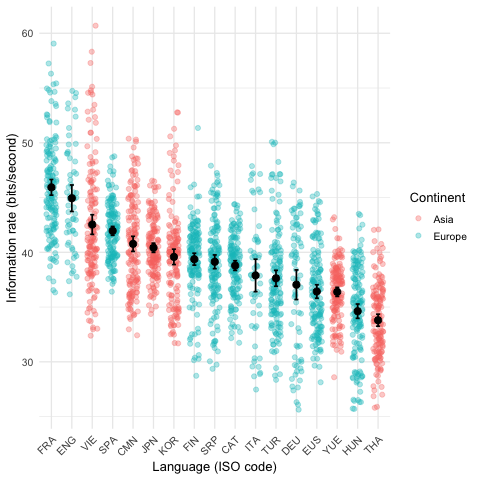

In [10]:
%%R

library(dplyr)
library(ggplot2)
library(forcats)

# merge + compute information_rate per observation
spoken_lang <- spoken_df %>%
  left_join(languages_df %>% select(iso_lang, information_density, continent),
            by = "iso_lang") %>%
  mutate(information_rate = (syllables / duration) * information_density) %>%
  filter(!is.na(information_rate), !is.na(continent))

# summary stats per language (mean + 95% CI)
summary_df <- spoken_lang %>%
  group_by(iso_lang, continent) %>%
  summarise(
    mean = mean(information_rate),
    sd = sd(information_rate),
    n = n(),
    .groups = "drop"
  ) %>%
  mutate(
    se = sd / sqrt(n),
    ci = 1.96 * se,
    ci_low = mean - ci,
    ci_high = mean + ci
  )

# order languages by mean information_rate (descending)
spoken_lang <- spoken_lang %>%
  left_join(summary_df %>% select(iso_lang, mean), by = "iso_lang") %>%
  mutate(iso_lang = fct_reorder(iso_lang, mean, .desc = TRUE))

summary_df <- summary_df %>%
  mutate(iso_lang = fct_reorder(iso_lang, mean, .desc = TRUE))

# plot: jitter points + mean + 95% CI
plot_c <- ggplot() +
  geom_jitter(
    data = spoken_lang,
    aes(x = iso_lang, y = information_rate, color = continent),
    width = 0.25, height = 0,
    alpha = 0.35, size = 2
  ) +
  geom_errorbar(
    data = summary_df,
    aes(x = iso_lang, ymin = ci_low, ymax = ci_high),
    color = "black", linewidth = 0.8, width = 0.2
  ) +
  geom_point(
    data = summary_df,
    aes(x = iso_lang, y = mean),
    color = "black", size = 3
  ) +
  labs(
    x = "Language (ISO code)",
    y = "Information rate (bits/second)",
    color = "Continent"
  ) +
  coord_cartesian(ylim = range(spoken_lang$information_rate, na.rm = TRUE)) +  # don't force 0
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot_c

# 4. Tell a story

<div class="alert alert-info" style="color:black">

### Question 4
rubric={reasoning:3}
    
These results are looking pretty promising, now we just need to add a narrative so that it will be easy for others to follow along with what we have done here. Tell a story using the three plots we have created. Build it up according to the principles and examples from this week's required readings. In your story you can refer to the plots as plot A,B, and C. You story should make it clear what the plot is telling us and how it motivates the next plot we're making so that there is a clear story line for the reader to follow as well as a clear take home message (there might be many messages in these plots, so you can choose which to focus on). No need to write an essay here, a succinct paragraph per plot should do it.

</div>

YOUR ANSWER GOES HERE

Plot A: It shows information density vs number os distinct syllables. The points cluster, and coloring by continent explains the clusters pretty well. This makes us wonder: if languages pack info differently, do people comensate by speaking faster/slower?

Plot B: It plots information density vs average speech rate. There's a clear trade-off: higher density languages tend to be spoken more slowly, and faster speech tends to have lower density. So instead of maximizing both, languages seem to balance the two.

Plot C: It combines them into information rate (bits/sec) per speaker, then shows the mean and 95% CI per language. Most languages end up in a similar range and many CIs overlap, so differences look relatively small. Take-home: lanuages vary in density and speed, but overall information throughput is fairly similar. 

# 5. Figure composition

<p>Now that we have the individual figures and the story, the final step for us here is to compile our figures into the same layout for presentation.</p>

<div class="alert alert-info" style="color:black">

### Question 5
rubric={accuracy:1,viz:2}
    
    
<h4>Python</h4>
<ol type="1">
<li>Assign each of your previous three plots to a variable name (you don’t have to repeat the code down here, you can assign it in the original cell, just make sure you are still outputting the variable at the end of those cells so that the plots still are displayed after each cell).</li>
<li>Arrange the three plots into a layout with the two scatter plots in a column to the left and mean + CI plot to the right. The overall layout should look even, so make the scatterplots about half the height and two thirds of the width of the mean + CI plot.</li>
<li>Set proper titles where you judge it is needed. Show that you know the proper command to save this as a png file on your local computer.</li>
</ol>
    
</div> 

In [27]:
# YOUR ANSWER GOES HERE
#plot A:
plot_a = (colored + trend + labels).properties(
    title="Plot A: Information density vs. distinct syllables",
    width=420,
    height=220
)
plot_a

#plot B
plot_b = (base2 + trend2 + labels2).properties(
    title="Plot B: Information density vs. speech rate",
    width=420,
    height=220
)
plot_b


#plot C:
plot_c = (points + ci_bars + mean_points).properties(
    title="Plot C: Information rate by language (mean ± 95% CI)",
    width=630,
    height=460
)
plot_c

layout = alt.hconcat(
    alt.vconcat(plot_a, plot_b, spacing=10),
    plot_c,
    spacing=20
).resolve_scale(color="shared")  # optional: keep same color legend mapping

layout

#save the graph
layout.save("lab4_plots.png", scale_factor=2)


alt.HConcatChart(...)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


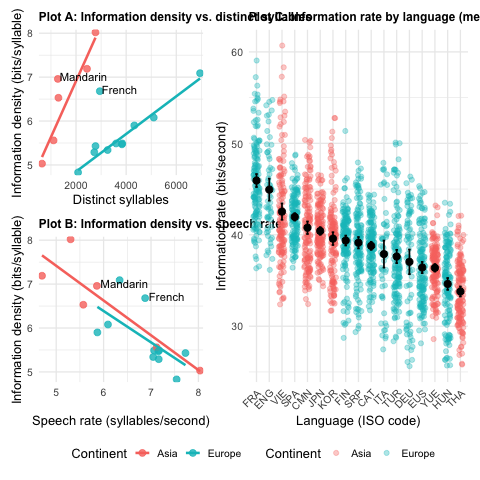

In [12]:
%%R

library(ggplot2)
library(patchwork)

plot_a <- plot_a +
  labs(title = "Plot A: Information density vs. distinct syllables") +
  theme(plot.title = element_text(size = 12, face = "bold"))

plot_b <- plot_b +
  labs(title = "Plot B: Information density vs. speech rate") +
  theme(plot.title = element_text(size = 12, face = "bold"))

plot_c <- plot_c +
  labs(title = "Plot C: Information rate by language (mean ± 95% CI)") +
  theme(plot.title = element_text(size = 12, face = "bold"))

layout <- (plot_a / plot_b) | plot_c
layout <- layout +
  plot_layout(widths = c(3, 4), guides = "collect") &
  theme(legend.position = "bottom")

layout

ggsave("lab4_plots.png", plot = layout, width = 16, height = 7, dpi = 300)

---

Thank you, this has certainly been educational. I'll present these results to the intergalactic ministry of traffic and hopefully we can spare earth from the hyperspace bypass this time around... ah shoot, me and my big mouth! Basically there is nothing to worry about, you just keep squabbling amongst each other over lines in the sand and hopefully you wont hear from us again. So long and thanks for all the fish! 🛸🐬

---

# 6. Presenting figures to a general or a technical audience 

<p>Below you can see the original figure from <a href="https://www.science.org/doi/10.1126/sciadv.aaw2594">the scientific article in “Science Advances”</a> and the <a href="https://www.economist.com/graphic-detail/2019/09/28/why-are-some-languages-spoken-faster-than-others">simplified version that was published in the Economist</a> (you can create a free account to read the article, no need to pay or use the trial). There is also an R Markdown file for how they did their analysis in the article supplementary materials in case you're interested.</p>

<div class="alert alert-warning" style="color:black">

### Question 6 (Optional)
rubric={reasoning:1.5}

<ol type="1">
<li>Briefly describe how the Economist have simplified the figure from the original scientific publication.</li>
<li>Do you agree with choices made by the Economist? Is there anything you think could have been done differently or additionally, that would have communicated the findings more clearly to a general / popular science audience? This could be based on design choices or your understanding of the data.</li>
</ol>

</div>

## Scientific figure

![image.png](img/article.png)

## Popular science figure

![image.png](img/economist.png)

YOUR ANSWER GOES HERE

# 7. Tell your story

<p>Only do this exercise if you feel like you have time over after completing all labs and want additional feedback on your story telling. It will likely take some time and does not give that many points.</p>

<div class="alert alert-warning" style="color:black">

### Question 7 (Optional)
rubric={reasoning:1}
 
<p>Use the same data to tell another story than the one we told here. Suggestively, you would do some EDA and then use around 2-3 figures with accompanying text to tell a short story about an interesting relationship that you found. I encourage you to try to think of an idea of your own, but if you can't come up with one, I have listed a few ideas below.</p>
    
<details><summary>Suggested ideas to explore</summary>
<ul>
<li>Does the particular text matter for which continent or language was faster? (you could do a paired comparison here)</li>
<li>Group by each speaker’s mean instead of showing all texts (I would personally prefer this to what we did above as I think it shows the variation and sample size more truly, although the means will be similar)</li>
<li>Add language families from the paper and see if there are any patterns among them.</li>
<li>Add additional language features such as tonality and see if there any patterns there.</li>
<li>Plot the different language features on a map.</li>
</ul>
</details>

</div>

In [ ]:
# YOUR ANSWER GOES HERE

YOUR ANSWER GOES HERE

---

A couple of interesting videos on communication and language if you have some spare time this weekend:

- Switching from auditory transfer to electric via implants such as [Kevin Warvick's cyborg-like connection of his nervous system to the internet and his wife's jewelry](https://www.youtube.com/watch?v=Z8HeFNJjuj0&feature=youtu.be&t=822).
- There is evidence that the words we have at our disposal influences how we think. This could mean that certain thought patterns and emotions might be more accessible in languages where they are more easily verbalized, and maybe we would have slightly different thoughts if we knew another language (the reference here is the weak form of the Sapiro-Whorf hypothesis of linguistic relativity, not the strong version). After you are done with the lab, I recommend listening to [this talk by Lera Boroditsky](https://www.youtube.com/watch?v=RKK7wGAYP6k) or watching the movie "Arrival" (although they go a bit far...) if you are interested in learning more about this (it's fun to think about!).

---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Commit and push all your work (including the .ipynb file) to GitHub.
3. Submit a link to your repo on Canvas (this has to be done only once per group).

---

# Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans: 5 hours

2. Were there any questions that you particularly liked or disliked?

#Ans: [Questions you liked]

#Ans: [Questions you disliked]